<a href="https://colab.research.google.com/github/SamAlrahmani/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Sam_Alrahmani_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# Replicate the lesson here :) 
# i I start with imports !!

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
#using the magic symbole % to specify some non-python code
%matplotlib inline

In [0]:
# Here i I specify the plot style i I want to use with pandas matplotlib 
plt.style.use('fast')

In [14]:
#Read in the titanic dataset
url= 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic= pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [15]:
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [16]:
#Display CABIN CLASS using either numer number or string values. 
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


In [17]:
# Display 'Fare' in histogram 
titanic['Fare'].value_counts().head()

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
Name: Fare, dtype: int64

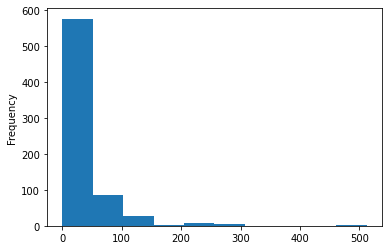

In [23]:
titanic['Fare'].plot(kind='hist'); 

In [24]:
#remove the exteme extreme outliers 
titanic['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

(709, 9)


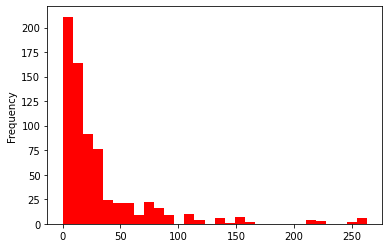

In [44]:
#remove the exteme extreme outliers 
#run the histo after the cleaning
print(titanic.shape)
titanic=titanic[titanic['Fare']<500]
titanic['Fare'].plot(kind='hist', color='red', bins=30); 

In [45]:
#Convert the continous var to categorial var using binning 
farelabels=['low', 'medium', 'high', 'vhigh']
titanic['fare_groups']= pd.cut(titanic['Fare'], bins=[0,8,15,32,264], labels=farelabels)
titanic[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [0]:
#check the results 
fare_results= titanic['fare_groups'].value_counts().sort_index()

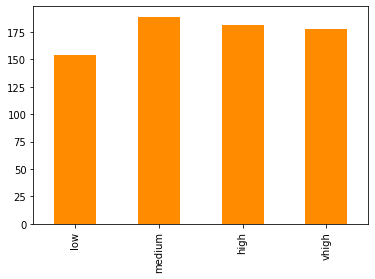

In [58]:
#Specify the range of Y-axiz axis to get more accutate results. 
fare_results.plot(kind='bar', color='darkorange');

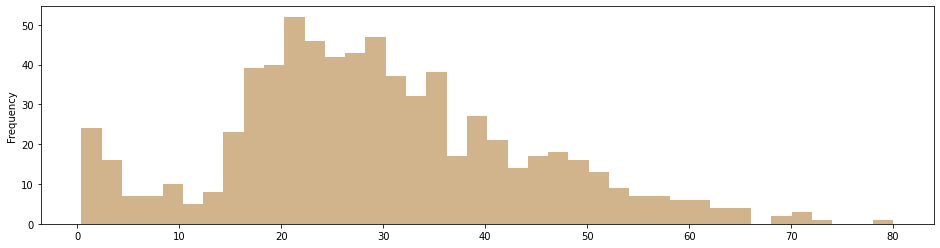

In [62]:
#Display a single continous continuous var
#Histogram
titanic['Age'].plot(kind='hist', bins=40, figsize=(16,4), color='tan');

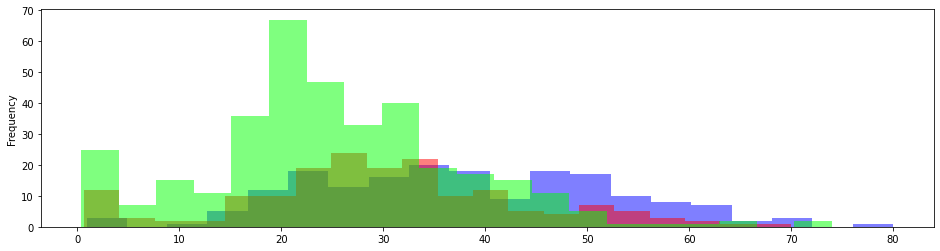

In [76]:
# Stacked Histogram of continuous variable, broken out by categorical variable
#titanic['Age'].plot(kind='hist', bins=40, figsize=(16,4), color='tan');
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=20, figsize=(16,4),
                                          color='blue', alpha=0.5);
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=20, figsize=(16,4),
                                          color='red', alpha=0.5);
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=20, figsize=(16,4), 
                                          color='lime', alpha=0.5);

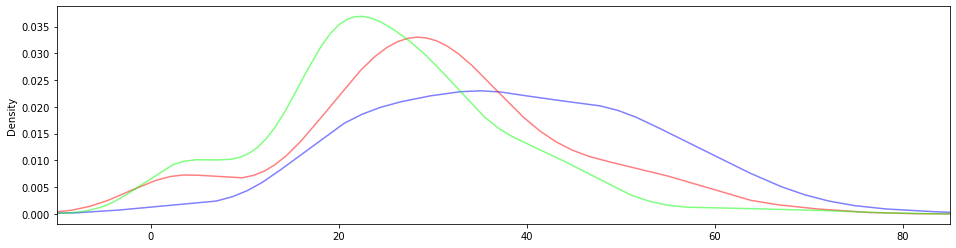

In [80]:
#using Kernel Density Estimate (KDE)
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(-10, 85), figsize=(16,4),
                                          color='blue', alpha=0.5);
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(-10, 85), figsize=(16,4),
                                          color='red', alpha=0.5);
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(-10, 85), figsize=(16,4), 
                                          color='lime', alpha=0.5);

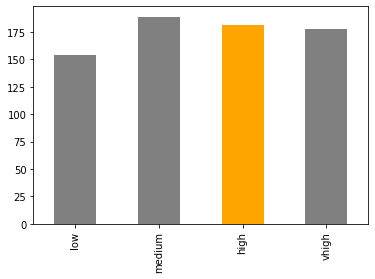

In [84]:
# Display single Categorical Var. 
#using color to make one bar is showed more than others
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['gray', 'gray', 'orange', 'gray'])

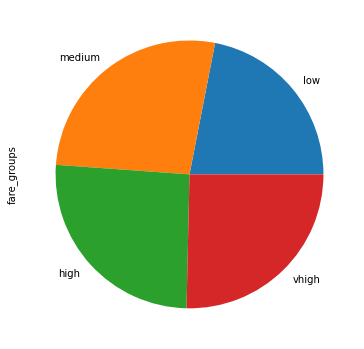

In [91]:
#doing Pie chart
titanic['fare_groups'].value_counts().sort_index().plot(kind='pie', figsize=(6, 12));

In [93]:
# Compare two categorical variables using crosstab
cab_death=pd.crosstab(titanic['cabin_class'], titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


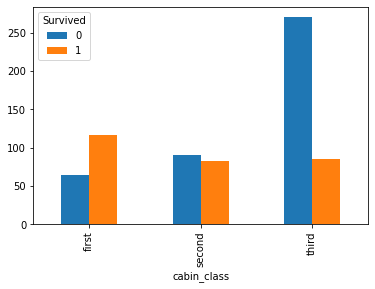

In [94]:
#put in chart
cab_death.plot(kind='bar');

In [97]:
#Crosstab with column %
cab_death1=pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


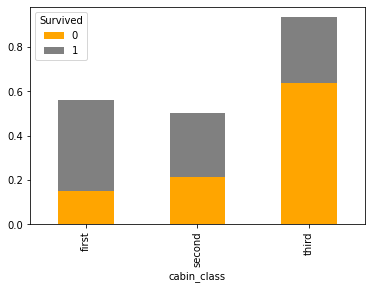

In [98]:
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [99]:
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.347826,0.652174
second,0.520231,0.479769
third,0.760563,0.239437


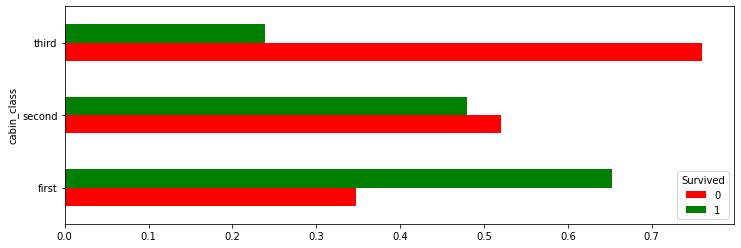

In [105]:
cab_death2.plot(kind='barh', color=['red', 'green'], figsize=(12,4));

In [108]:
#Compare a categorical and continuous variable
titanic['Age'].describe()
titanic['Age'].mean()
titanic['Age'].median()
titanic['Age'].std()
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [113]:
#explore that continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age=titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

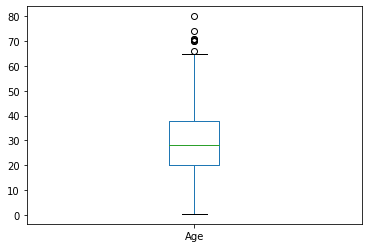

In [114]:
#visualize that !
titanic['Age'].plot(kind='box');